Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help theTexas state government  team to know the payroll information of employees of the state of Texas.  

Task 3:-
●	Who are the outliers in the salaries?
●	What departments/roles have the biggest wage disparities between managers and employees?
●	Have salaries and total compensations for some roles/ departments/ head-count changed over time?


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer


In [2]:
df=pd.read_csv("salary.csv")
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [3]:
df.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [5]:
df.shape

(149481, 21)

In [6]:
df.describe(include='all')

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
count,149481.000000,149481,149481,149481,149481,149481,149481,149481,149481,149481,...,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,143,14.0,97,16.000000,16
unique,NaN,113,38675,23559,27,1481,1422,6,2,11,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1
top,NaN,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True
freq,NaN,36667,1243,1843,38408,9267,9267,67142,85328,142502,...,NaN,NaN,NaN,NaN,NaN,143,NaN,97,NaN,16
mean,545.736288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,NaN,1.0,NaN,74303.955000,NaN
std,139.057691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,NaN,0.0,NaN,51925.944282,NaN
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,50.000000,600.000000,1.000000e+00,NaN,1.0,NaN,18000.000000,NaN
25%,529.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,NaN,1.0,NaN,32962.500000,NaN
50%,530.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,NaN,1.0,NaN,48063.300000,NaN
75%,696.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,NaN,1.0,NaN,123751.770000,NaN


In [7]:
df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


# Rename the Columns name 

In [8]:
df= df.rename(columns={'AGENCY NAME':'AGENCY_NAME','CLASS CODE' :'CLASS_CODE','CLASS TITLE':'CLASS_TITLE' , 'EMPLOY DATE':'EMPLOY_DATE', 'HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK'})
df.head(0)

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search


In [9]:
df['EMPLOY_DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 149481 entries, 0 to 149480
Series name: EMPLOY_DATE
Non-Null Count   Dtype 
--------------   ----- 
149481 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


# Find the Null value 

In [10]:
df.isnull().sum()

AGENCY                          0
AGENCY_NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [11]:
df.head(0)

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search


In [12]:
contnious=df[['HRLY_RATE','HRS_PER_WK','MONTHLY','ANNUAL','summed_annual_salary']].corr()
contnious

,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,summed_annual_salary
HRLY_RATE,1.000000,-0.337784,0.086291,0.086291,0.392481
HRS_PER_WK,-0.337784,1.000000,0.096041,0.096041,0.529473
MONTHLY,0.086291,0.096041,1.000000,1.000000,0.977757
ANNUAL,0.086291,0.096041,1.000000,1.000000,0.977757
summed_annual_salary,0.392481,0.529473,0.977757,0.977757,1.000000


# Correlation between Monthly and Annual is showing 1 and also summed_annual_salary are showing 0.97 so we can drop these columns .

In [13]:
df.drop(columns=['ANNUAL','summed_annual_salary'],inplace=True)
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717,True,NaN,NaN,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717,True,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,59115,True,NaN,NaN,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,59115,True,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,165030,True,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490,NaN,NaN,NaN,NaN


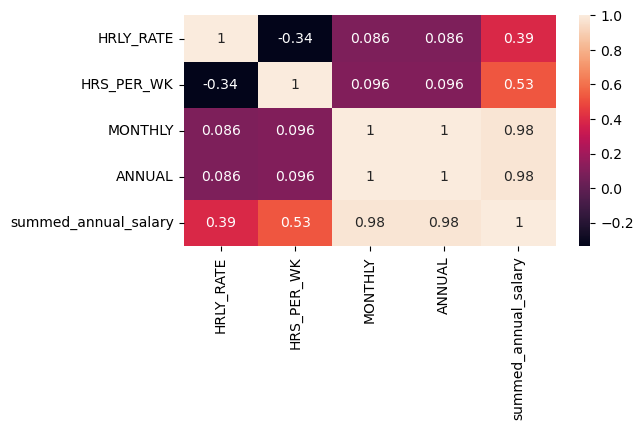

In [14]:
plt.figure(figsize=(6,3))
sns.heatmap(contnious,annot=True)
plt.show()

In [15]:
df.drop(columns=['duplicated', 'multiple_full_time_jobs','combined_multiple_jobs','hide_from_search'], inplace=True)
df

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,123490


In [16]:
df.head(0)

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE NUMBER


In [17]:
df.drop(columns=['EMPLOY_DATE'], inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
X = df.drop(columns=['MONTHLY'])
y = df['MONTHLY']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(119584, 13)

In [22]:
X_test.shape

(29897, 13)

# Check Numeric columns in dataset 

In [23]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(num_cols))

Numeric columns: ['AGENCY', 'HRLY_RATE', 'HRS_PER_WK', 'STATE NUMBER']


# Check Categorical columns in dataset 

In [24]:
cat_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", list(cat_cols))

Categorical columns: ['AGENCY_NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS_CODE', 'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS']


In [25]:
N_Columns=['AGENCY', 'HRLY_RATE', 'HRS_PER_WK', 'STATE NUMBER']

In [26]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [27]:
num_imputer = SimpleImputer(strategy='median')

In [28]:
X_train[N_Columns] = pd.DataFrame(num_imputer.fit_transform(X_train[N_Columns]),columns=N_Columns,index=X_train.index)
X_test[N_Columns] = pd.DataFrame(num_imputer.transform(X_test[N_Columns]),columns=N_Columns,index=X_test.index)

In [29]:
cat_columns=['AGENCY_NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS_CODE', 'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS']

In [30]:
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[cat_columns] = cat_imputer.fit_transform(X_train[cat_columns])
X_test[cat_columns] = cat_imputer.transform(X_test[cat_columns])

In [31]:
X.select_dtypes(include='object').nunique().sort_values(ascending=False).head(20)


LAST NAME      38675
FIRST NAME     23559
CLASS_CODE      1481
CLASS_TITLE     1422
AGENCY_NAME      113
MI                27
STATUS            11
ETHNICITY          6
GENDER             2
dtype: int64

In [32]:
#Below mention Columns are not use in our work , So we can drop these columns.

X = X.drop(['LAST NAME', 'FIRST NAME', 'CLASS_CODE','AGENCY_NAME'], axis=1, errors='ignore')


In [33]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


In [ ]:
Model Creation 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("✅ Model Evaluation Results:")
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


✅ Model Evaluation Results:
R2 Score: 0.200840566857436
RMSE: 1888.0131820968343
MAE: 1223.0313687907599


In [38]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(importance.head(10))


        Feature  Coefficient
4        GENDER   551.080198
5        STATUS   233.840169
3     ETHNICITY   182.813901
7    HRS_PER_WK   138.144168
6     HRLY_RATE    27.379393
1            MI     3.812537
2   CLASS_TITLE     0.042767
8  STATE NUMBER    -0.001038
0        AGENCY    -3.264676


In [40]:
# Model Initialization
xgb_model = XGBRegressor(random_state=42)

# Model Training
xgb_model.fit(X_train, y_train)

# Prediction on Test Data
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("XGBRegressor Model Performance:")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


XGBRegressor Model Performance:
R2 Score: 0.9021
RMSE: 660.7289
MAE: 337.0008


In [41]:
lasso_model = Lasso(alpha=0.1, random_state=42)  # alpha is regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lasso, squared=False):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.4f}")

Lasso Regression Performance:
R2 Score: 0.2008
RMSE: 1888.0117
MAE: 1223.0127


In [42]:
ridge_model = Ridge(alpha=1.0, random_state=42)  # alpha is regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_ridge, squared=False):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.4f}")

Ridge Regression Performance:
R2 Score: 0.2008
RMSE: 1888.0131
MAE: 1223.0306


# Models and their scores by Visualization

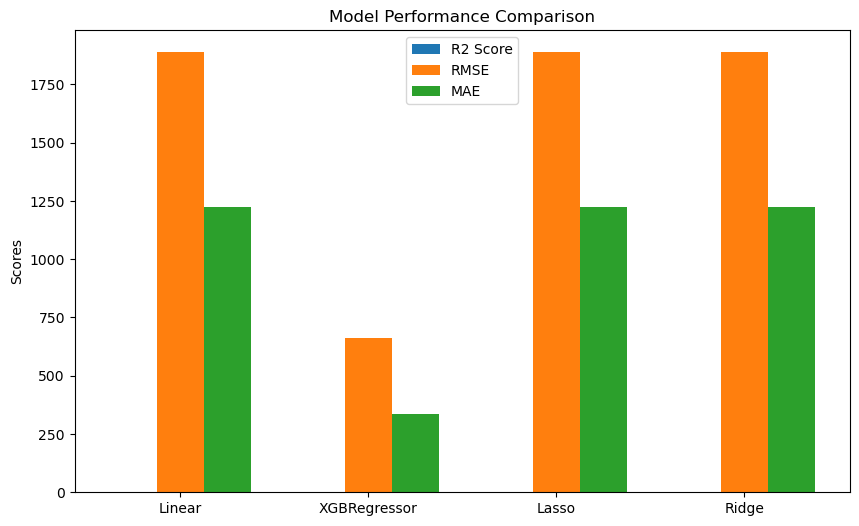

In [58]:

models = ['Linear', 'XGBRegressor', 'Lasso', 'Ridge']
r2_scores = [0.2008, 0.9021, 0.2008, 0.2008]
rmse_scores = [1888.01, 660.73, 1888.01, 1888.01]
mae_scores = [1223.03, 337.00, 1223.01, 1223.03]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, r2_scores, width, label='R2 Score')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, mae_scores, width, label='MAE')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()


# Final Overview and statment 

# After analyzing, cleaning the dataset, and applying multiple regression models, you found that XGBRegressor performs with the highest accuracy and the lowest error. So, XGBRegressor﻿ is the best model for your dataset.